In [15]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.cluster import KMeans
import glob
import pickle
from datetime import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ardelalegre/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'cov']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
data_with_time = pickle.load(open("july_first_np.p", "rb"))
data = data_with_time[:,:12]


In [4]:

print(data[0])
print(np.asarray(data[0]))

[-0.444  0.885  0.14     nan    nan    nan    nan    nan    nan    nan
    nan    nan]
[-0.444  0.885  0.14     nan    nan    nan    nan    nan    nan    nan
    nan    nan]


In [5]:
print(data.shape)
data_mean = np.nanmean(data,axis = 0,keepdims = True)
print(data_mean)


(217451, 12)
[[-0.67912647  0.54785298  0.28616772 -0.67088296  0.56292409  0.28495837
  -0.17352863 -0.91857956  0.17220478  0.82691013 -0.00581666  0.33859397]]


In [6]:
# subtracting the means from the data matrix

print(data_mean.shape)

data = data - data_mean

(1, 12)


In [7]:

# check that mean is now zero
np.nanmean(data,axis = 0,keepdims = True)

array([[-1.09003112e-13,  1.58376722e-14, -4.76301822e-14,
        -1.57145824e-13, -1.97553510e-14, -1.37021825e-14,
        -7.72331934e-15, -2.68639174e-16,  1.12090010e-13,
         1.32178806e-14,  1.67764203e-15, -2.68492637e-15]])

In [8]:
np.sum(np.isnan(data))
cdata=np.nan_to_num(data)
np.sum(np.isnan(cdata))

from numpy import linalg as LA

d=9  # dimension
data=data[:,0:d] # taking just the first 9 columns of data, ie from 3 arrays out of 4
cdata=cdata[:,0:d] # taking just the first 9 columns of cdata
n=cdata.shape[0] # n stores the number of data points
block_size=10000
# calculate covariance matrix

outters = np.zeros((d, d)) # a 9x9 matrix
Sout = np.zeros((d, d, n)) # a 9x9xn array where n is the number of data points
for j in range(n): # for each data point
    outters += np.outer(cdata[j,:],cdata[j,:]) 
    Sout[:,:,j]=np.outer(data[j,:],data[j,:]); # storing each outer product value in one slice of Sout
#   Sout[:,:,j]=data[j,:] @ data[j,:].T;
#   if j%block_size==0:
#       print('\r %d: '%j,end='')

#for d1 in range(d):
#   for d2 in range(d):
#     Sout[d1,d2,:]
   
cov = outters/n # calculating covariance matrix
SCM=np.nanmean(Sout,axis=2) # calculating the mean slice - this should also be the covariance matrix



In [9]:
SCMstd=np.nanstd(Sout,axis=2) # calculating the standard deviation
print(SCMstd)


[[0.02399106 0.04016142 0.01835323 0.05638613 0.07665509 0.05004825
  0.01639514 0.00085077 0.00068301]
 [0.04016142 0.14514037 0.05284854 0.11314995 0.27527297 0.06397666
  0.03630892 0.01254679 0.00247447]
 [0.01835323 0.05284854 0.03952465 0.04907302 0.20138512 0.01674695
  0.05640058 0.01078125 0.00107555]
 [0.05638613 0.11314995 0.04907302 0.07456398 0.06899643 0.01808753
  0.03447317 0.01699607 0.0043171 ]
 [0.07665509 0.27527297 0.20138512 0.06899643 0.23698208 0.04125196
  0.11924527 0.09617722 0.01669075]
 [0.05004825 0.06397666 0.01674695 0.01808753 0.04125196 0.01345262
  0.03178079 0.02641735 0.00437496]
 [0.01639514 0.03630892 0.05640058 0.03447317 0.11924527 0.03178079
  0.1381288  0.06510129 0.01285506]
 [0.00085077 0.01254679 0.01078125 0.01699607 0.09617722 0.02641735
  0.06510129 0.04784723 0.008269  ]
 [0.00068301 0.00247447 0.00107555 0.0043171  0.01669075 0.00437496
  0.01285506 0.008269   0.0122012 ]]


In [10]:
SCMfinite=np.sum(np.isfinite(Sout),axis=2)/n 
#eigen values
eigen_values, eigen_vectors = LA.eig(cov)
eigen_valuesSCM, eigen_vectorsSCM = LA.eig(SCM)

In [12]:
eigen_values

array([0.06340537, 0.03787144, 0.0172076 , 0.00581688, 0.00388465,
       0.00275632, 0.00064362, 0.00133698, 0.00095388])

In [13]:
eig_val_sorted_indices = np.argsort(eigen_values)
print(eig_val_sorted_indices)
eig_val_sorted_indices = eig_val_sorted_indices[-1::-1]
print(eig_val_sorted_indices)
eig_val_sorted_indices.shape

[6 8 7 5 4 3 2 1 0]
[0 1 2 3 4 5 7 8 6]


(9,)

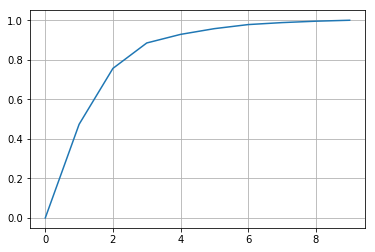

In [16]:
eig_val_ordered=eigen_values[eig_val_sorted_indices]
eig_val_cumul = np.cumsum(eig_val_ordered)
eig_val_cumul /= eig_val_cumul[-1]
plot([0]+list(eig_val_cumul))
grid()

In [17]:
sorted_eigvec = eigen_vectors[:,eig_val_sorted_indices]

In [20]:
data.shape, sorted_eigvec.shape

((217451, 9), (9, 9))

In [21]:
%%time
data_proj_ev1 = np.dot(cdata,sorted_eigvec[:,:2])


CPU times: user 32.2 ms, sys: 19.3 ms, total: 51.5 ms
Wall time: 12.4 ms


In [22]:
data_proj_ev1.shape

(217451, 2)

In [23]:
N=data_proj_ev1.shape[0]
time_axis = np.arange(N)
type(time_axis)

numpy.ndarray

In [26]:
leftx = -0.6
rightx = 0.5
lefty = -0.6
righty = 0.75

In [ ]:
figure(figsize=[15,15])
Length=8000
print("Each plot represents activity for " + str(8000 * 0.008) + " seconds")
i=1
for T1 in range(0,data.shape[0],Length):
    subplot(5,5,i)
#     print(data_with_time[T1,12])
#     print(datetime.datetime.fromtimestamp(data_with_time[T1,12]))
    plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time[T1,12]))[11:16])
    scatter(data_proj_ev1[T1:T1+Length,0], data_proj_ev1[T1:T1+Length,1],marker='.',s=1,c=np.arange(T1,T1+Length))
    
#     plt.xlim(leftx,rightx)
#     plt.ylim(lefty,righty)
    i=i+1
    if (i>25):
        break

Each plot represents activity for 64.0 seconds
